In [14]:
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt

In [15]:
results_dir = "./logs/final_results_6/"

# number of each results
curriculum_num = 2
scratch_num = 6
human_num = 1

curriculum_list, scratch_list, human_list = [], [], []

for i in range(curriculum_num):
    with open(os.path.join(results_dir, "curriculum_{}.pkl".format(i)), "rb") as f:
        curriculum_list.append(pickle.load(f))

for i in range(scratch_num):
    with open(os.path.join(results_dir, "scratch_{}.pkl".format(i)), "rb") as f:
        scratch_list.append(pickle.load(f))

for i in range(human_num):
    with open(os.path.join(results_dir, "human_{}.pkl".format(i)), "rb") as f:
        human_list.append(pickle.load(f))

In [16]:
curriculum_dict, scratch_dict, human_dict = {}, {}, {}

keys = ["velocity_error_mean", "velocity_error_std", "velocity_error_min", "velocity_error_max", "episode_length_mean"]

for key in keys:
    curriculum_dict[key] = []
    scratch_dict[key] = []
    human_dict[key] = []

for i in range(curriculum_num):
    for key in keys:
        if curriculum_list[i][key] == 0:
            curriculum_dict[key].append(2)
        else:
            curriculum_dict[key].append(curriculum_list[i][key])

for i in range(scratch_num):
    for key in keys:
        if scratch_list[i][key] == 0:
            scratch_dict[key].append(2)
        else:
            scratch_dict[key].append(scratch_list[i][key])

for i in range(human_num):
    for key in keys:
        if human_list[i][key] == 0:
            human_dict[key].append(2)
        else:
            human_dict[key].append(human_list[i][key])

In [17]:
velocity_error_data = {}

velocity_error_data["curriculum"] = np.array(curriculum_dict["velocity_error_mean"]).mean()
velocity_error_data["scratch"] = np.array(scratch_dict["velocity_error_mean"]).mean()
velocity_error_data["human"] = np.array(human_dict["velocity_error_mean"]).mean()

velocity_error_data["curriculum_std"] = np.array(curriculum_dict["velocity_error_std"]).mean()
velocity_error_data["scratch_std"] = np.array(scratch_dict["velocity_error_std"]).mean()
velocity_error_data["human_std"] = np.array(human_dict["velocity_error_std"]).mean()

# velocity_error_data["curriculum_min"] = curriculum_dict["velocity_error_min"]
# velocity_error_data["scratch_min"] = scratch_dict["velocity_error_min"]
# velocity_error_data["human_min"] = human_dict["velocity_error_min"]

# velocity_error_data["curriculum_max"] = curriculum_dict["velocity_error_max"]
# velocity_error_data["scratch_max"] = scratch_dict["velocity_error_max"]
# velocity_error_data["human_max"] = human_dict["velocity_error_max"]

In [18]:
episode_length_data = {}

episode_length_data["curriculum"] = np.array(curriculum_dict["episode_length_mean"]).mean()
episode_length_data["scratch"] = np.array(scratch_dict["episode_length_mean"]).mean()
episode_length_data["human"] = np.array(human_dict["episode_length_mean"]).mean()

episode_length_data["curriculum_std"] = np.array(curriculum_dict["episode_length_mean"]).std()
episode_length_data["scratch_std"] = np.array(scratch_dict["episode_length_mean"]).std()
episode_length_data["human_std"] = np.array(human_dict["episode_length_mean"]).std()
episode_length_data["human_std"] = 41.58

In [19]:
# Print the results
print("Velocity Error")
print("Curriculum: {:.2f} +/- {:.2f}".format(velocity_error_data["curriculum"], velocity_error_data["curriculum_std"]))
print("Scratch: {:.2f} +/- {:.2f}".format(velocity_error_data["scratch"], velocity_error_data["scratch_std"]))
print("Human: {:.2f} +/- {:.2f}".format(velocity_error_data["human"], velocity_error_data["human_std"]))

print("\nEpisode Length")
print("Curriculum: {:.2f} +/- {:.2f}".format(episode_length_data["curriculum"], episode_length_data["curriculum_std"]))
print("Scratch: {:.2f} +/- {:.2f}".format(episode_length_data["scratch"], episode_length_data["scratch_std"]))
print("Human: {:.2f} +/- {:.2f}".format(episode_length_data["human"], episode_length_data["human_std"]))

Velocity Error
Curriculum: 0.46 +/- 0.38
Scratch: 1.13 +/- 0.57
Human: 0.26 +/- 0.30

Episode Length
Curriculum: 315.44 +/- 73.95
Scratch: 146.66 +/- 114.12
Human: 230.86 +/- 41.58


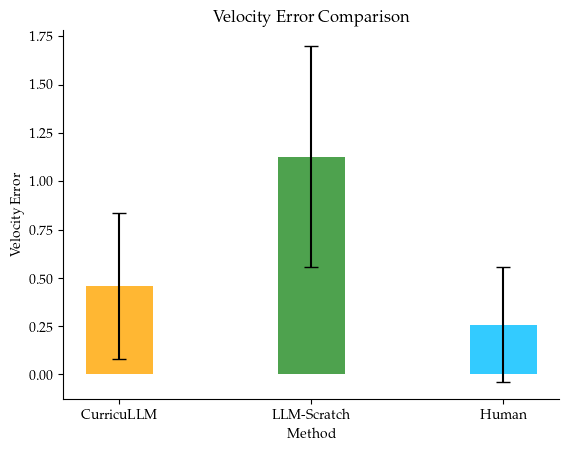

In [20]:
# Make a bar graph
fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.8

curriculum_color = "orange"
scratch_color = "forestgreen"
human_color = "deepskyblue"

bar1 = ax.bar(0, velocity_error_data["curriculum"], bar_width, alpha=opacity, color=curriculum_color, yerr=velocity_error_data["curriculum_std"], capsize=5, label="Curriculum")
bar2 = ax.bar(1, velocity_error_data["scratch"], bar_width, alpha=opacity, color=scratch_color, yerr=velocity_error_data["scratch_std"], capsize=5, label="Scratch")
bar3 = ax.bar(2, velocity_error_data["human"], bar_width, alpha=opacity, color=human_color, yerr=velocity_error_data["human_std"], capsize=5, label="Human")

ax.set_xlabel("Method")
ax.set_ylabel("Velocity Error")
ax.set_title("Velocity Error Comparison")
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(["CurricuLLM", "LLM-Scratch", "Human"])

# Remove the top and right axes
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

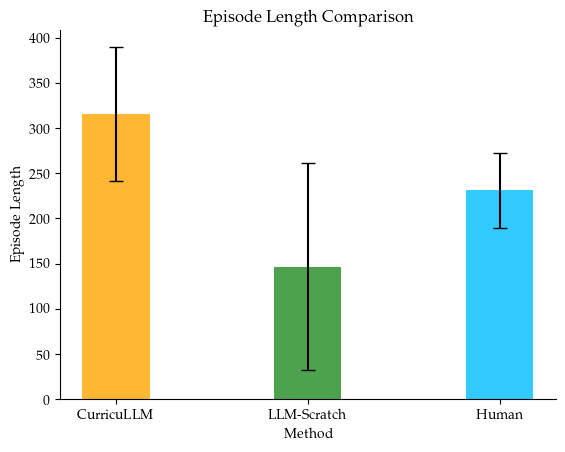

In [21]:
# Make a bar graph
fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.8

bar1 = ax.bar(0, episode_length_data["curriculum"], bar_width, alpha=opacity, color=curriculum_color, yerr=episode_length_data["curriculum_std"], capsize=5, label="Curriculum")
bar2 = ax.bar(1, episode_length_data["scratch"], bar_width, alpha=opacity, color=scratch_color, yerr=episode_length_data["scratch_std"], capsize=5, label="Scratch")
bar3 = ax.bar(2, episode_length_data["human"], bar_width, alpha=opacity, color=human_color, yerr=episode_length_data["human_std"], capsize=5, label="Human")

ax.set_xlabel("Method")
ax.set_ylabel("Episode Length")
ax.set_title("Episode Length Comparison")
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(["CurricuLLM", "LLM-Scratch", "Human"])

# Remove the top and right axes
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

# Hardware Data

In [22]:
data_dir = "~/Downloads/policy_2.csv"

# Load the using pandas
import pandas as pd

data = pd.read_csv(data_dir)
print(data.head(0))

Empty DataFrame
Columns: [__time, /cmd_vel/header/stamp/nanosec, /cmd_vel/header/stamp/sec, /cmd_vel/twist/angular/x, /cmd_vel/twist/angular/y, /cmd_vel/twist/angular/z, /cmd_vel/twist/linear/x, /cmd_vel/twist/linear/y, /cmd_vel/twist/linear/z, /main_controller/odom/header/header/stamp, /main_controller/odom/pose/covariance/[0;0], /main_controller/odom/pose/covariance/[0;1], /main_controller/odom/pose/covariance/[0;2], /main_controller/odom/pose/covariance/[0;3], /main_controller/odom/pose/covariance/[0;4], /main_controller/odom/pose/covariance/[0;5], /main_controller/odom/pose/covariance/[1;1], /main_controller/odom/pose/covariance/[1;2], /main_controller/odom/pose/covariance/[1;3], /main_controller/odom/pose/covariance/[1;4], /main_controller/odom/pose/covariance/[1;5], /main_controller/odom/pose/covariance/[2;2], /main_controller/odom/pose/covariance/[2;3], /main_controller/odom/pose/covariance/[2;4], /main_controller/odom/pose/covariance/[2;5], /main_controller/odom/pose/covariance

In [23]:
data.fillna(method='ffill', inplace=True)
data["/main_controller/odom/pose/pose/orientation/roll"]

/tmp/ipykernel_12135/815484825.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
29881    0.055762
29882    0.055763
29883    0.055763
29884    0.055763
29885    0.055764
Name: /main_controller/odom/pose/pose/orientation/roll, Length: 29886, dtype: float64

In [24]:
interested_data = data[["__time", "/cmd_vel/header/stamp/sec", "/cmd_vel/twist/linear/x", "/cmd_vel/twist/linear/y", "/cmd_vel/twist/angular/z", "/main_controller/odom/twist/twist/angular/z", "/main_controller/odom/twist/twist/linear/x", "/main_controller/odom/twist/twist/linear/y"]]

In [25]:
angle_data = data[["/main_controller/odom/pose/pose/orientation/pitch", "/main_controller/odom/pose/pose/orientation/roll", "/main_controller/odom/pose/pose/orientation/yaw"]]

In [26]:
# Transform the command velocity in the robot frame to the world frame
# Conduct the 3d rotation
def transform(data):
    x = data["/cmd_vel/twist/linear/x"]
    y = data["/cmd_vel/twist/linear/y"]
    z = data["/cmd_vel/twist/angular/z"]

    roll = data["/main_controller/odom/pose/pose/orientation/roll"]
    pitch = data["/main_controller/odom/pose/pose/orientation/pitch"]
    yaw = data["/main_controller/odom/pose/pose/orientation/yaw"]

    # Rotation matrix
    R = np.array([[np.cos(yaw)*np.cos(pitch), np.cos(yaw)*np.sin(pitch)*np.sin(roll) - np.sin(yaw)*np.cos(roll), np.cos(yaw)*np.sin(pitch)*np.cos(roll) + np.sin(yaw)*np.sin(roll)],
                  [np.sin(yaw)*np.cos(pitch), np.sin(yaw)*np.sin(pitch)*np.sin(roll) + np.cos(yaw)*np.cos(roll), np.sin(yaw)*np.sin(pitch)*np.cos(roll) - np.cos(yaw)*np.sin(roll)],
                  [-np.sin(pitch), np.cos(pitch)*np.sin(roll), np.cos(pitch)*np.cos(roll)]])

    # Transform the velocity
    velocity = np.array([x, y, z])
    velocity = velocity.reshape(3, 1, -1)
    transformed_velocity = np.matmul(R.transpose(2,0,1), velocity.transpose(2,0,1)).squeeze(-1).transpose(1,0)

    return transformed_velocity

In [27]:
transformed_velocity = transform(data)
transformed_velocity = pd.DataFrame(transformed_velocity.T, columns=["x", "y", "z"])

In [28]:
# Smooth the odometry data
def smooth(data, window_size=5):
    smoothed_data = data.rolling(window=window_size).mean()
    return smoothed_data

smoothed_data = smooth(interested_data, window_size=100)

In [29]:
plt.rcParams["font.family"] = 'serif'
plt.rcParams["font.sans-serif"] = ['Palatino'] + plt.rcParams["font.sans-serif"]
plt.rcParams['text.usetex'] = True

# Assign color to each experiments
transformed_command_color = 'forestgreen'
smoothed_color = 'darkorange'
raw_color = 'gold'

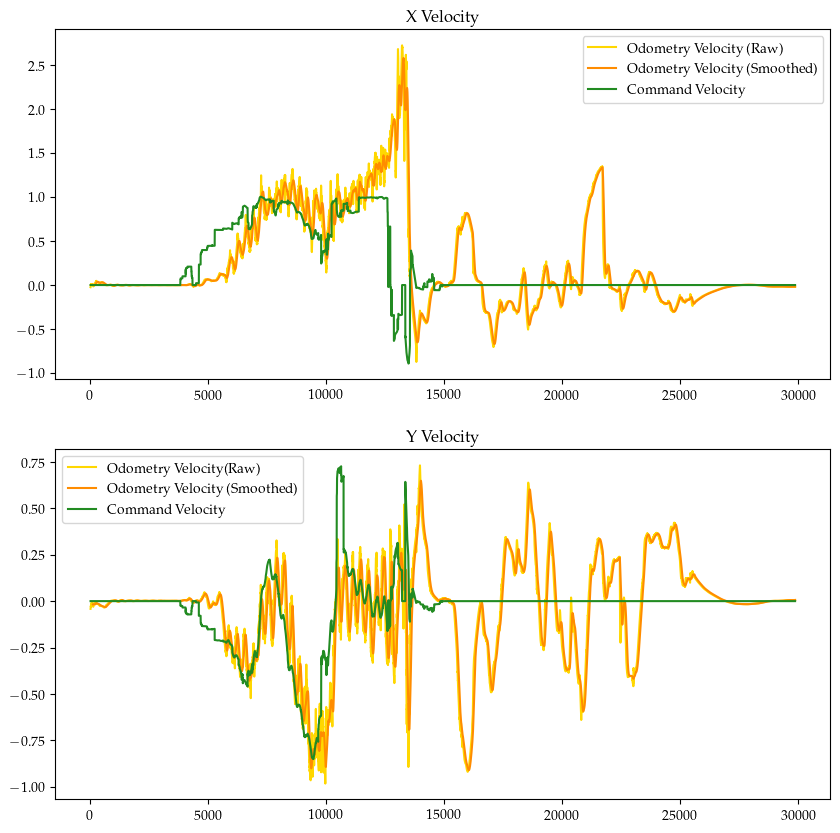

In [30]:
# Plot the xyz velocity in each subfigure and compare with the command velocity and smoothed odometry velocity
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

ax[0].plot(interested_data["/main_controller/odom/twist/twist/linear/x"], label="Odometry Velocity (Raw)", color=raw_color)
ax[0].plot(smoothed_data["/main_controller/odom/twist/twist/linear/x"], label="Odometry Velocity (Smoothed)", color=smoothed_color)
ax[0].plot(transformed_velocity["x"], label="Command Velocity", color=transformed_command_color)
ax[0].set_title("X Velocity")
ax[0].legend()

ax[1].plot(interested_data["/main_controller/odom/twist/twist/linear/y"], label="Odometry Velocity(Raw)", color=raw_color)
ax[1].plot(smoothed_data["/main_controller/odom/twist/twist/linear/y"], label="Odometry Velocity (Smoothed)", color=smoothed_color)
ax[1].plot(transformed_velocity["y"], label="Command Velocity", color=transformed_command_color)
ax[1].set_title("Y Velocity")
ax[1].legend()

# ax[2].plot(interested_data["/main_controller/odom/twist/twist/angular/z"], label="Odometry Velocity (Raw)", color=raw_color)
# ax[2].plot(smoothed_data["/main_controller/odom/twist/twist/angular/z"], label="Odometry Velocity (Smoothed)", color=smoothed_color)
# ax[2].plot(transformed_velocity["z"], label="Command Velocity", color=transformed_command_color)
# ax[2].set_title("Z Velocity")
# ax[2].legend()

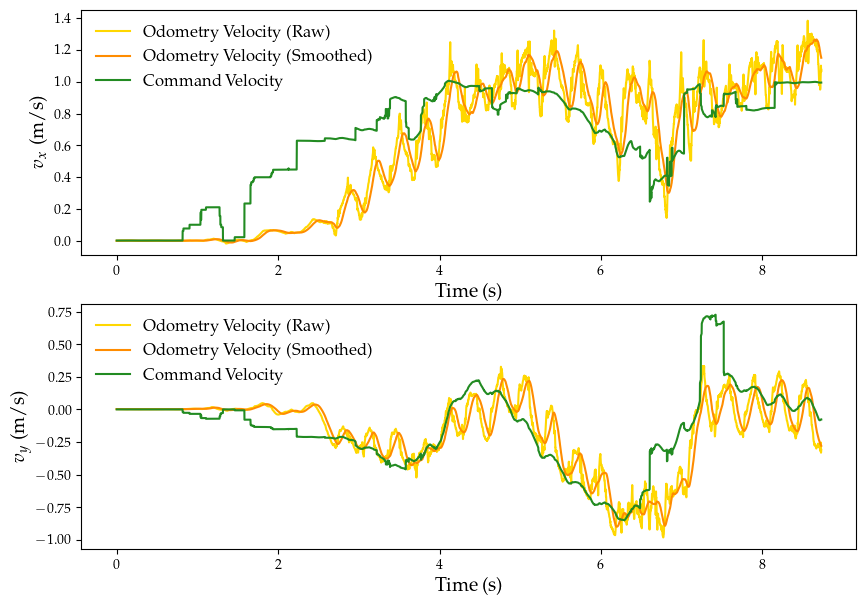

In [33]:
# Only plot in interested interval
start = 3000
end = 12000

# remove the time offset based on start time
interested_data.loc[:, "__time"] = interested_data["__time"] - interested_data["__time"].iloc[start] 
# scale the time to seconds
interested_data.loc[:, "__time"] = interested_data["__time"]

fig, ax = plt.subplots(2, 1, figsize=(10, 7))

ax[0].plot(interested_data["__time"][start:end], interested_data["/main_controller/odom/twist/twist/linear/x"][start:end], label="Odometry Velocity (Raw)", color=raw_color)
ax[0].plot(interested_data["__time"][start:end], smoothed_data["/main_controller/odom/twist/twist/linear/x"][start:end], label="Odometry Velocity (Smoothed)", color=smoothed_color)
ax[0].plot(interested_data["__time"][start:end], transformed_velocity["x"][start:end], label="Command Velocity", color=transformed_command_color)
# ax[0].set_title("X Velocity")
ax[0].legend(frameon=False, fontsize=12)
ax[0].set_xlabel("Time (s)", fontsize=14)
ax[0].set_ylabel(r'$ v_x $ (m/s)', fontsize=14)

ax[1].plot(interested_data["__time"][start:end], interested_data["/main_controller/odom/twist/twist/linear/y"][start:end], label="Odometry Velocity (Raw)", color=raw_color)
ax[1].plot(interested_data["__time"][start:end], smoothed_data["/main_controller/odom/twist/twist/linear/y"][start:end], label="Odometry Velocity (Smoothed)", color=smoothed_color)
ax[1].plot(interested_data["__time"][start:end], transformed_velocity["y"][start:end], label="Command Velocity", color=transformed_command_color)
# ax[1].set_title("Y Velocity")
ax[1].legend(frameon=False, fontsize=12)
ax[1].set_xlabel("Time (s)", fontsize=14)
ax[1].set_ylabel(r'$ v_y $ (m/s)', fontsize=14)

# ax[2].plot(interested_data["__time"][start:end], interested_data["/main_controller/odom/twist/twist/angular/z"][start:end], label="Odometry Velocity (Raw)", color=raw_color)
# ax[2].plot(interested_data["__time"][start:end], smoothed_data["/main_controller/odom/twist/twist/angular/z"][start:end], label="Odometry Velocity (Smoothed)", color=smoothed_color)
# ax[2].plot(interested_data["__time"][start:end], transformed_velocity["z"][start:end], label="Command Velocity", color=transformed_command_color)
# # ax[2].set_title("Yaw Velocity")
# ax[2].legend(frameon=False, fontsize=12)
# ax[2].set_xlabel("Time (s)", fontsize=14)
# ax[2].set_ylabel(r'$ \omega_z $ (rad/s)', fontsize=14)

plt.savefig("velocity_comparison.pdf", dpi=300, bbox_inches='tight')